<center>
    <img src="https://raw.githubusercontent.com/Luisjimherz/Bedu-Python-CarAccidentsMX/main/data/img/logo.png" width="70" alt="cognitiveclass.ai logo"  />
    <h1>Bedu-Python-CarAccidents</h1>
    <h2>Análisis de accidentes vehiculares en la CDMX del 2017-2021</h2>
    <h3>Bedu - Equipo 14</h3>
</center>

Tiempo estimado de lectura: **30** minutos

## Descripción 

Éste proyecto analisa los datos del 2016 al 2021 proporcionados por el C4, un sistema de registro Mexicano de incidentes vehiculares. 


# Problema

Actualmente, la ocurrencia de accidentes vehiculares es un problema importante que impacta diferentes ámbitos de la sociedad, siendo una problemática tanto de movilidad como de seguridad ciudadana. 

El análisis de los datos existentes sobre los incidentes vehiculares es un primer paso que podría dar lugar al desarrollo de herramientas que permitan hacer más eficiente su atención e incluso prevenir la ocurrencia de los mismos.

Lo anterior implica conocer cuándo, cómo y dónde ocurren los accidentes vehiculares, el impacto que tienen sobre los involucrados, y la manera en que las autoridades competentes responden a ellos.

# Preguntas

Los puntos importantes de conocer para este propósito se enfocan en tres puntos clave:

* La distribución de la ocurrencia de incidentes viales en el tiempo, que abre preguntas como:
    1. ¿En qué épocas del año hay más accidentes?
    2. ¿En qué horarios del día ocurren más accidentes?
    3. ¿Hay más accidentes en días festivos, o fines de semana, o vacaciones que en días normales?

* La distribución geográfica de la ocurrencia de accidentes
    1. ¿En qué lugares ocurren más accidentes¡

* La preparación de las autoriades para responder a dichos incidentes
    1. ¿Cómo se enteran las autoridades de u incidente vial?
    2. ¿Qué proceso se lleva a cabo después de que ocurre un incidente?

* La letalidad de los incidentes viales
    1. ¿Cuántos incidentes implican la defunción de los involucrados?
    2. ¿Qué tipos de accidentes son más comunes?
    3. ¿Qué tipo de accidentes son más letales?
    
* La situación actual de contingencia sanitaria
    1. ¿Han cocurrido menos incidentes desde que inició la pandemia?
    2. ¿La pandemia ha influido en la letalidad de los accidentes?

# Datasets seleccionados

Se utilizaron los datasets de reportes de incidentes vehiculares en la ciudad de México de los años 2017, 2018, 2019 y 2021 provistos por el sitio oficial de la Secretaría de seguridad ciudadana y disponibles en https://www.kaggle.com/laloromero/mexico-road-accidents-during-2019 (2017-2019) y en https://datos.cdmx.gob.mx/dataset/incidentes-viales-c5 (2021)

# Importación de datos

In [22]:
# Librerías utilizadas
import pandas as pd, datetime as dt, numpy as np, matplotlib.pyplot as plt

In [23]:
plt.style.use('ggplot')

Como los datasets tienen un nombre de plantilla, diferenciado únicamente por el año al que pertenecen, se puede automatizar el proceso de lectura y concatenación de datos haciendo uso de un fstring y un ciclo for.

In [24]:
data = pd.read_csv("data/incidentes-viales-c5-2017.csv")

In [25]:
years = ["2018", "2019", "2021"]
for y in years:
    df = pd.read_csv(f"data/incidentes-viales-c5-{y}.csv")
    data = pd.concat([data, df], axis=0, ignore_index=True)

# Análisis exploratorio

In [26]:
data.head()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes,Unnamed: 0,ano
0,C5/170622/06952,22/06/2017,20:34:45,Jueves,(D) El incidente reportado se registró en dos ...,22/06/2017,2017.0,Junio,20:39:42,MILPA ALTA,accidente-choque sin lesionados,19.20137,-99.00732,EMERGENCIA,LLAMADA DEL 911,MILPA ALTA,"19.20137004,-99.00731988",6,NaN,NaN
1,C5/170622/05115,22/06/2017,16:41:14,Jueves,(D) El incidente reportado se registró en dos ...,22/06/2017,2017.0,Junio,16:46:02,TLAHUAC,accidente-choque sin lesionados,19.29659,-99.03443,EMERGENCIA,LLAMADA DEL 911,TLAHUAC,"19.29659004,-99.03443004",6,NaN,NaN
2,C5/170622/03715,22/06/2017,13:44:52,Jueves,(N) La unidad de atención a emergencias fue de...,22/06/2017,2017.0,Junio,16:48:07,VENUSTIANO CARRANZA,accidente-choque sin lesionados,19.43053,-99.05260,EMERGENCIA,LLAMADA DEL 911,VENUSTIANO CARRANZA,"19.43053002,-99.05259996",6,NaN,NaN
3,C5/170622/05317,22/06/2017,17:08:58,Jueves,(D) El incidente reportado se registró en dos ...,22/06/2017,2017.0,Junio,17:20:34,IZTAPALAPA,accidente-choque con lesionados,19.36189,-99.12243,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,"19.36188999,-99.12242988",6,NaN,NaN
4,C5/170622/05348,22/06/2017,17:12:38,Jueves,(D) El incidente reportado se registró en dos ...,22/06/2017,2017.0,Junio,17:25:27,IZTAPALAPA,accidente-choque con lesionados,19.36168,-99.12210,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,"19.36168002,-99.12210012",6,NaN,NaN


In [27]:
data.tail()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes,Unnamed: 0,ano
693688,C5/210228/09309,28/02/2021,22:24:48,Domingo,N,28/02/2021,NaN,NaN,23:44:19,IZTAPALAPA,accidente-choque sin lesionados,19.349940,-99.066890,EMERGENCIA,LLAMADA DEL 911,IZTAPALAPA,NaN,2,12943.0,2021.0
693689,C5/210228/09401,28/02/2021,22:45:49,Domingo,N,28/02/2021,NaN,NaN,22:58:58,GUSTAVO A. MADERO,lesionado-atropellado,19.491660,-99.092150,URGENCIAS MEDICAS,LLAMADA DEL 911,GUSTAVO A. MADERO,NaN,2,12944.0,2021.0
693690,C5/210228/09405,28/02/2021,22:45:59,Domingo,D,28/02/2021,NaN,NaN,22:49:07,MIGUEL HIDALGO,accidente-choque con lesionados,19.396770,-99.237120,URGENCIAS MEDICAS,LLAMADA DEL 911,MIGUEL HIDALGO,NaN,2,12945.0,2021.0
693691,C5/210228/09417,28/02/2021,22:48:36,Domingo,A,28/02/2021,NaN,NaN,23:48:19,AZCAPOTZALCO,accidente-choque sin lesionados,19.481660,-99.218560,EMERGENCIA,LLAMADA DEL 911,AZCAPOTZALCO,NaN,2,12946.0,2021.0
693692,IZ/210228/07916,28/02/2021,19:46:33,Domingo,A,28/02/2021,NaN,NaN,20:17:58,XOCHIMILCO,accidente-choque sin lesionados,19.244195,-99.108017,EMERGENCIA,BOTÓN DE AUXILIO,XOCHIMILCO,NaN,2,12947.0,2021.0


# Limpieza

## Conversiones de tipo

In [28]:
data.dtypes


folio                 object
fecha_creacion        object
hora_creacion         object
dia_semana            object
codigo_cierre         object
fecha_cierre          object
año_cierre           float64
mes_cierre            object
hora_cierre           object
delegacion_inicio     object
incidente_c4          object
latitud              float64
longitud             float64
clas_con_f_alarma     object
tipo_entrada          object
delegacion_cierre     object
geopoint              object
mes                    int64
Unnamed: 0           float64
ano                  float64
dtype: object

Para su posterior análisis, es necesario convertir los tipos de datos de las siguientes columnas:

* Datetime
    - Fecha de creacion 
    - Hora de creación 
    - Fecha de cierre
    - Hora cierre 
    
* Categórico
    - codigo de cierre
    - Delgación
    - inciente_c4
    - clas_on_f_alarma 
    - tipo_etrada 
    - delegacon_cierre
    - mes

Además se decide unir las columnas de fecha y hora de creación en un timestamp común. Lo mismo para las columnas de cierre.

In [29]:
# timestamp de creación
data['fecha_hora_creacion'] = data['fecha_creacion']+ " " + data['hora_creacion']

In [30]:
# timestamp de cierre
data['fecha_hora_cierre'] = data['fecha_cierre']+ " " + data['hora_cierre']

Se borran las columnas de año, fecha y hora de cierre y creación, así como de geopoint.

In [31]:
data_s1 = data.drop(columns=['año_cierre', 
                             'mes_cierre',
                             'fecha_cierre', 
                             'fecha_creacion', 
                             'hora_cierre', 
                             'hora_creacion', 
                             'ano',
                             "Unnamed: 0",
                             "geopoint"])

In [32]:
# Borrar columnas 
diccionario_de_conversion = {
    'codigo_cierre': 'category',
    'fecha_hora_creacion': 'datetime64[ns]',
    'fecha_hora_cierre': 'datetime64[ns]', 
    'delegacion_inicio': 'category',
    'incidente_c4': 'category', 
    'clas_con_f_alarma': 'category', 
    'tipo_entrada': 'category',
    'delegacion_cierre':'category',
    'mes':'category'
}

In [33]:
data_s1 = data_s1.astype(diccionario_de_conversion)

In [36]:
data_s1.describe()

,latitud,longitud
count,693250.000000,693258.000000
mean,19.383188,-99.150078
std,0.370154,3.388433
min,19.095427,-991.764000
25%,19.335850,-99.180270
50%,19.382990,-99.140560
75%,19.433770,-99.095020
max,195.303000,-98.945370


## Tratamiento de valores nulos

Se analizan cuántos datos con valores existen para determinar como manejar dichos valores

In [37]:
print(data_s1.shape)
data_s1.isnull().sum()

(693693, 13)


folio                    0
dia_semana               0
codigo_cierre            0
delegacion_inicio       59
incidente_c4             0
latitud                443
longitud               435
clas_con_f_alarma        0
tipo_entrada             0
delegacion_cierre       41
mes                      0
fecha_hora_creacion      0
fecha_hora_cierre        2
dtype: int64

Como los datos nulos en el dataset son muy pocos en comparación a la cantidad total de registros entonces se eliminan.

In [38]:
data_s1.dropna(inplace = True)

## Valores duplicados

De acuerdo con la documentación del dataset, la columna "codigo_cierre" contiene claves que indican la forma de proceder de la SSC en cada reporte, siendo dichas claves las siguientes:

* A = “Afirmativo”: Una unidad de atención a emergencias fue despachada, llegó al lugar de los hechos y confirmó la emergencia reportada

* N = “Negativo”: Una unidad de atención a emergencias fue despachada, llegó al lugar de los hechos, pero en el sitio del evento nadie confirmo la emergencia ni fue solicitado el apoyo de la unidad

* I = “Informativo”: Corresponde a solicitudes de información

* F = “Falso”: El incidente reportado inicialmente fue considerado como falso en el lugar de los hechos.

* D = “Duplicados”: El incidente reportado se registró en dos o más ocasiones procediendo a mantener un solo reporte como el original.

Por lo que para trabajar únicamente con un reporte de incidente es necesario eliminar los datos cuyo "codigo_cierre" sea D.

In [40]:
data_s1["codigo_cierre"].unique()

['(D) El incidente reportado se registró en dos..., '(N) La unidad de atención a emergencias fue d..., '(A) La unidad de atención a emergencias fue d..., '(F) El operador/a o despachador/a identifican..., '(I) El incidente reportado es afirmativo y se..., 'D', 'A', 'N', 'F', 'I']
Categories (10, object): ['(D) El incidente reportado se registró en dos..., '(N) La unidad de atención a emergencias fue d..., '(A) La unidad de atención a emergencias fue d..., '(F) El operador/a o despachador/a identifican..., ..., 'A', 'N', 'F', 'I']

In [41]:
# Filtrando los valores de codigo_cierre que no son etiqueta D
data_clean = data_s1[~data_s1['codigo_cierre'].str.contains("D", regex=True)]   
data_clean.head()

,folio,dia_semana,codigo_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,mes,fecha_hora_creacion,fecha_hora_cierre
2,C5/170622/03715,Jueves,(N) La unidad de atención a emergencias fue de...,VENUSTIANO CARRANZA,accidente-choque sin lesionados,19.43053,-99.05260,EMERGENCIA,LLAMADA DEL 911,VENUSTIANO CARRANZA,6,2017-06-22 13:44:52,2017-06-22 16:48:07
5,C5/170621/07339,Miércoles,(A) La unidad de atención a emergencias fue de...,IZTAPALAPA,accidente-choque sin lesionados,19.38676,-99.03350,EMERGENCIA,LLAMADA DEL 911,IZTAPALAPA,6,2017-06-21 23:29:01,2017-06-22 03:53:51
8,C5/170622/01694,Jueves,(N) La unidad de atención a emergencias fue de...,IZTAPALAPA,accidente-choque sin lesionados,19.35017,-99.07324,EMERGENCIA,LLAMADA DEL 911,IZTAPALAPA,6,2017-06-22 08:51:30,2017-06-22 10:47:19
9,C5/170622/03779,Jueves,(N) La unidad de atención a emergencias fue de...,CUAJIMALPA,accidente-choque sin lesionados,19.37273,-99.27753,EMERGENCIA,LLAMADA DEL 911,CUAJIMALPA,6,2017-06-22 13:49:44,2017-06-22 14:17:46
12,C5/170622/04693,Jueves,(N) La unidad de atención a emergencias fue de...,MIGUEL HIDALGO,accidente-choque sin lesionados,19.45316,-99.19868,EMERGENCIA,LLAMADA DEL 911,MIGUEL HIDALGO,6,2017-06-22 15:48:39,2017-06-22 16:47:41


## Datos inconsistentes

Dentro de los registros del 2017 se encuentran algunos incidentes del 2016. Lo mismo ocurre con los registros del 2021 que incluyen algunos incidenes reportados en el 2020. Sin embargo no se cuentan con datasets extensos para dichos años, por lo que no son significativos para el análisis.

En consecuencia, borramos los registros de reportes levantados en 2016 y 2020.

In [42]:
# Existen únicamente 18 registros del 2020
data_clean[data_clean["fecha_hora_creacion"].dt.year==2016].shape

(18, 13)

In [43]:
# Existen únicamente 3 registros del 2020
data_clean[data_clean["fecha_hora_creacion"].dt.year==2020].shape

(3, 13)

In [46]:
inconsistentes = (data_clean["fecha_hora_creacion"].dt.year!=2020) & (data_clean["fecha_hora_creacion"].dt.year!=2016)
data_clean = data_clean[inconsistentes]

Además, se encontró que los timestamps de creación y cierre no tenían el formato estándar para el casting a datetime. Por lo que se corrigieron los timestamps haciendo uso de la librería datetime.

De esta manera se concluye el proceso de limpieza de datos para obtener un dataset de trabajo consistente.

In [47]:
data_clean.reset_index(inplace=True)
data_s2 = data_clean.copy()
data_clean.head(20)

,index,folio,dia_semana,codigo_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,mes,fecha_hora_creacion,fecha_hora_cierre
0,2,C5/170622/03715,Jueves,(N) La unidad de atención a emergencias fue de...,VENUSTIANO CARRANZA,accidente-choque sin lesionados,19.430530,-99.052600,EMERGENCIA,LLAMADA DEL 911,VENUSTIANO CARRANZA,6,2022-06-17 13:44:52,2022-06-17 16:48:07
1,5,C5/170621/07339,Miércoles,(A) La unidad de atención a emergencias fue de...,IZTAPALAPA,accidente-choque sin lesionados,19.386760,-99.033500,EMERGENCIA,LLAMADA DEL 911,IZTAPALAPA,6,2021-06-17 23:29:01,2022-06-17 03:53:51
2,8,C5/170622/01694,Jueves,(N) La unidad de atención a emergencias fue de...,IZTAPALAPA,accidente-choque sin lesionados,19.350170,-99.073240,EMERGENCIA,LLAMADA DEL 911,IZTAPALAPA,6,2022-06-17 08:51:30,2022-06-17 10:47:19
3,9,C5/170622/03779,Jueves,(N) La unidad de atención a emergencias fue de...,CUAJIMALPA,accidente-choque sin lesionados,19.372730,-99.277530,EMERGENCIA,LLAMADA DEL 911,CUAJIMALPA,6,2022-06-17 13:49:44,2022-06-17 14:17:46
4,12,C5/170622/04693,Jueves,(N) La unidad de atención a emergencias fue de...,MIGUEL HIDALGO,accidente-choque sin lesionados,19.453160,-99.198680,EMERGENCIA,LLAMADA DEL 911,MIGUEL HIDALGO,6,2022-06-17 15:48:39,2022-06-17 16:47:41
5,14,C5/170622/03959,Jueves,(A) La unidad de atención a emergencias fue de...,ALVARO OBREGON,accidente-choque sin lesionados,19.316550,-99.220900,EMERGENCIA,LLAMADA DEL 911,ALVARO OBREGON,6,2022-06-17 14:14:50,2022-06-17 18:05:37
6,15,C5/170621/06698,Miércoles,(A) La unidad de atención a emergencias fue de...,ALVARO OBREGON,accidente-choque sin lesionados,19.397480,-99.190120,EMERGENCIA,LLAMADA DEL 911,ALVARO OBREGON,6,2021-06-17 21:36:02,2022-06-17 00:14:49
7,17,C5/170621/06943,Miércoles,(A) La unidad de atención a emergencias fue de...,GUSTAVO A. MADERO,accidente-choque con lesionados,19.479010,-99.097550,URGENCIAS MEDICAS,LLAMADA DEL 911,GUSTAVO A. MADERO,6,2021-06-17 22:15:26,2022-06-17 01:57:31
8,19,C5/170622/05066,Jueves,(A) La unidad de atención a emergencias fue de...,IZTACALCO,accidente-choque sin lesionados,19.392350,-99.098670,EMERGENCIA,LLAMADA DEL 911,IZTACALCO,6,2022-06-17 16:34:47,2022-06-17 18:37:53
9,21,C5/170622/02873,Jueves,(N) La unidad de atención a emergencias fue de...,ALVARO OBREGON,accidente-choque sin lesionados,19.403120,-99.196730,EMERGENCIA,LLAMADA DEL 911,ALVARO OBREGON,6,2022-06-17 11:54:17,2022-06-17 12:04:51


In [33]:
data_clean.to_csv("data/incidentes-viales-c5-limpio.csv", sep="$")

# Resolución de preguntas

## Separación de accidentes y falsas alarmas

Para poder responder las preguntas planteadas, es necesatio diferenciar claramente los incidentes viales observados en la Ciudad de México, separando los reportes identificados como falsas alarmas, que son aquellos en los que la SSC determinó que el evento reportado no era un incidente vial real.

Tales falsas alarmas se identifican con la etiqueta F en la columna "codigo_cierre"

In [69]:
accidentes = data_clean[~data_clean["codigo_cierre"].str.contains("F", regex=True)]
falsas = data_clean[data_clean["codigo_cierre"].str.contains("F", regex=True)]

## I. Distribución temporal de los incidentes automovilísticos

Para poder responder de manera sencilla a las preguntas relacionadas con el tiempo al que ocurren los accidentes, se añadieron columnas de apoyo al dataset de accidentes:

In [71]:
# Año de ocurrencia del incidente
accidentes["año"] =accidentes["fecha_hora_creacion"].dt.year

# Hora de ocurrencia del incidente
accidentes["hora"] = accidentes["fecha_hora_creacion"].dt.hour

<ipython-input-71-f54ca05add33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidentes["año"] =accidentes["fecha_hora_creacion"].dt.year
<ipython-input-71-f54ca05add33>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidentes["hora"] = accidentes["fecha_hora_creacion"].dt.hour


También se creo una columna con el horario en que ocurrió el incidente con base en la hora de su reporte. 
* Se considera madrugada si ocurre antes de las 6 horas
* Se considera mañana si ocurre entre las 6 y 12 horas
* Se considera tarde si ocurre entre las 12 y 18 horas
* Se considera noche si ocurre pasadas las 18 horas


In [73]:
accidentes.columns

Index(['index', 'folio', 'dia_semana', 'codigo_cierre', 'delegacion_inicio',
       'incidente_c4', 'latitud', 'longitud', 'clas_con_f_alarma',
       'tipo_entrada', 'delegacion_cierre', 'mes', 'fecha_hora_creacion',
       'fecha_hora_cierre', 'año', 'hora'],
      dtype='object')

In [74]:
# Creacion de columna horarios
condiciones = [(accidentes["hora"] < 6),
              (accidentes["hora"] >= 6) & (accidentes["hora"] < 12), 
              (accidentes["hora"] >= 12) & (accidentes["hora"] < 18), 
              (accidentes["hora"] >= 18)]
valores = ["madrugada", "mañana", "tarde", "noche"]
accidentes["horario_accidente"] = np.select(condiciones, valores)

<ipython-input-74-59d34098abe4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidentes["horario_accidente"] = np.select(condiciones, valores)


También se añade una columna con valores booleanos para determinar si el incidente ocurrió en horas pico. Para ello se compara la hora de creación del reporte contra los conocidos "horarios pico" del tráfico de la ciudad de México reportados por el universal (https://interactivo.eluniversal.com.mx/2017/tiempo-trafico/) que son de 7:00 a 9:00 y de 16:00 a 20:00.

In [76]:
# Creación de columna de hora pico
horas_pico = ((accidentes["hora"] >= 7) & (accidentes["hora"] <=9)) | ((accidentes["hora"] >= 16) & (accidentes["hora"] <= 20))
accidentes["is_pico"] = np.where(horas_pico, True, False)

<ipython-input-76-a9598b74dc55>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidentes["is_pico"] = np.where(horas_pico, True, False)


Adicionalmente, se crea una columna que identifica si el día en que ocurre el incidente es día festivo. Para lo que hay que crear una lista con los timestamps de los días festivos oficiales de méxico de 2017 a 2021

In [89]:
# días festivos
festivos = [dt.datetime.strptime("2017-01-01", '%Y-%m-%d'),
           dt.datetime.strptime("2017-02-06", '%Y-%m-%d'),
           dt.datetime.strptime("2017-03-20", '%Y-%m-%d'),
           dt.datetime.strptime("2017-04-14", '%Y-%m-%d'),
           dt.datetime.strptime("2017-05-01", '%Y-%m-%d'),
           dt.datetime.strptime("2017-09-16", '%Y-%m-%d'),
           dt.datetime.strptime("2017-11-20", '%Y-%m-%d'),
           dt.datetime.strptime("2017-12-25", '%Y-%m-%d'),
           dt.datetime.strptime("2018-01-01", '%Y-%m-%d'),
           dt.datetime.strptime("2018-02-05", '%Y-%m-%d'),
           dt.datetime.strptime("2018-03-19", '%Y-%m-%d'),
           dt.datetime.strptime("2018-03-30", '%Y-%m-%d'),
           dt.datetime.strptime("2018-05-01", '%Y-%m-%d'),
           dt.datetime.strptime("2018-06-01", '%Y-%m-%d'),
           dt.datetime.strptime("2018-09-16", '%Y-%m-%d'),
           dt.datetime.strptime("2018-11-19", '%Y-%m-%d'),
           dt.datetime.strptime("2018-12-01", '%Y-%m-%d'),
           dt.datetime.strptime("2018-12-25", '%Y-%m-%d'),
           dt.datetime.strptime("2019-01-01", '%Y-%m-%d'),
           dt.datetime.strptime("2019-02-04", '%Y-%m-%d'),
           dt.datetime.strptime("2019-03-18", '%Y-%m-%d'),
           dt.datetime.strptime("2019-04-19", '%Y-%m-%d'),
           dt.datetime.strptime("2019-05-01", '%Y-%m-%d'),
           dt.datetime.strptime("2019-09-16", '%Y-%m-%d'),
           dt.datetime.strptime("2019-11-18", '%Y-%m-%d'),
           dt.datetime.strptime("2019-12-25", '%Y-%m-%d'),
           dt.datetime.strptime("2021-01-01", '%Y-%m-%d'),
           dt.datetime.strptime("2021-02-05", '%Y-%m-%d'),
           dt.datetime.strptime("2021-03-15", '%Y-%m-%d'),
           dt.datetime.strptime("2021-04-02", '%Y-%m-%d'),
           dt.datetime.strptime("2021-05-01", '%Y-%m-%d'),
           dt.datetime.strptime("2021-06-05", '%Y-%m-%d'),
           dt.datetime.strptime("2021-09-16", '%Y-%m-%d'),
           dt.datetime.strptime("2021-11-15", '%Y-%m-%d'),
           dt.datetime.strptime("2021-12-25", '%Y-%m-%d'),]

accidentes["is_festivo"] = np.where(accidentes["fecha_hora_creacion"].isin(festivos), True, False)

<ipython-input-89-4947acd96484>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidentes["is_festivo"] = np.where(accidentes["fecha_hora_creacion"].isin(festivos), True, False)


### ¿En qué meses ocurren más accidentes?

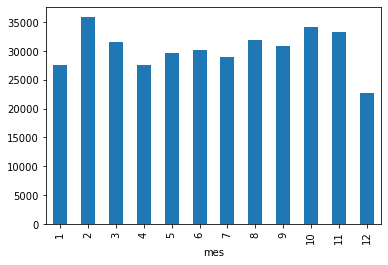

In [78]:
accidentes.groupby("mes").size().plot(kind="bar")

### ¿En qué año ocurrieron más accidentes?

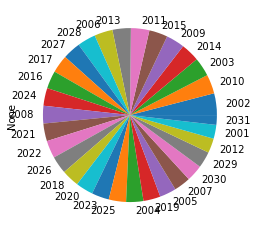

In [79]:
# Por año
accidentes.groupby("año").size().sort_values(ascending=False).plot.pie(y=" ")

### ¿Cuál fue la cantidad de accidentes por mes en cada año?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D83960820>,
      dtype=object)

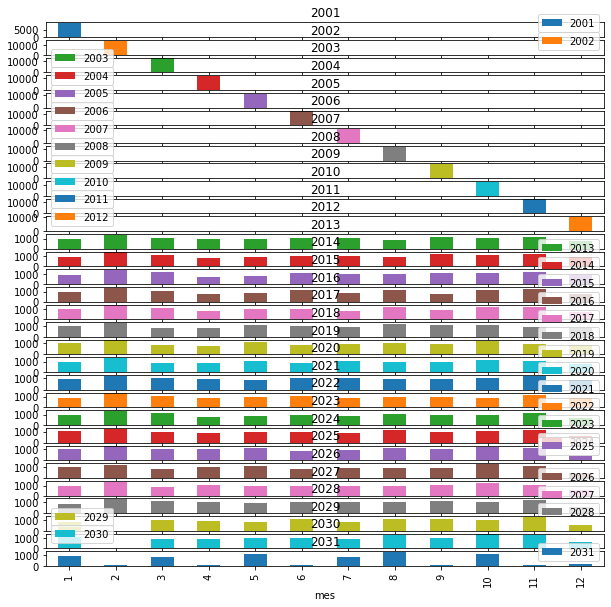

In [80]:
accidentes.groupby(["año", "mes"]).size().unstack(level=0).plot(kind='bar', subplots=True, figsize = (10,10))

### ¿A qué horas ocurrieron más accidentes?

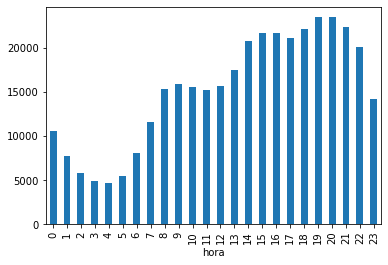

In [81]:
# Accidentes por hora
accidentes.groupby("hora").size().plot(kind="bar")

### ¿En qué días ocurren más reportes de incidentes?

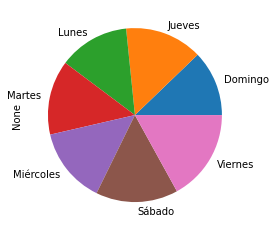

In [87]:
accidentes.groupby("dia_semana").size().plot.pie()

### ¿Cuántos incidentes se reportan por hora en cada día de la semana?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D88F9F670>,
      dtype=object)

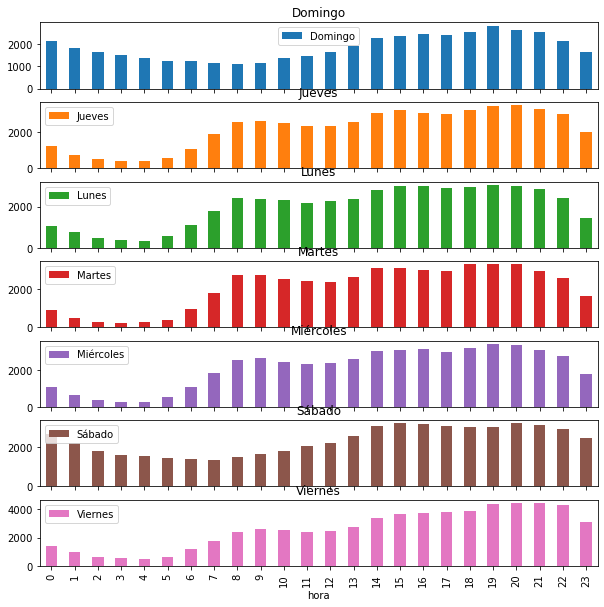

In [83]:
accidentes.groupby(["dia_semana", "hora"]).size().unstack(level=0).plot(kind='bar', subplots=True, figsize = (10,10))

### ¿En que horarios se concentran más los incidentes?

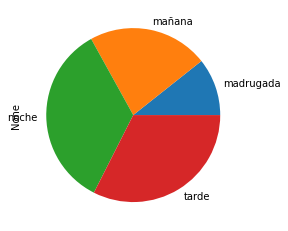

In [84]:
accidentes.groupby("horario_accidente").size().plot.pie()

### ¿Ocurren más accidentes en horas pico?

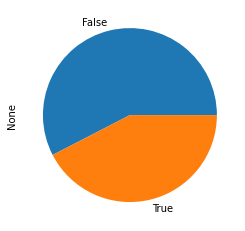

In [85]:
accidentes.groupby("is_pico").size().sort_values(ascending=False).plot.pie() 

### ¿Ocurren más incidentes en días festivos?

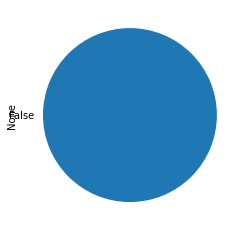

In [90]:
accidentes.groupby("is_festivo").size().plot.pie()

Los puntos importantes de conocer para este propósito se enfocan en tres puntos clave:

La distribución de la ocurrencia de incidentes viales en el tiempo, que abre preguntas como:

¿En qué épocas del año hay más accidentes?
¿En qué horarios del día ocurren más accidentes?
¿Hay más accidentes en días festivos, o fines de semana, o vacaciones que en días normales?
La distribución geográfica de la ocurrencia de accidentes

¿En qué lugares ocurren más accidentes¡
La preparación de las autoriades para responder a dichos incidentes

¿Cómo se enteran las autoridades de u incidente vial?
¿Qué proceso se lleva a cabo después de que ocurre un incidente?
La letalidad de los incidentes viales

¿Cuántos incidentes implican la defunción de los involucrados?
¿Qué tipos de accidentes son más comunes?
¿Qué tipo de accidentes son más letales?

La situación actual de contingencia sanitaria
¿Han cocurrido menos incidentes desde que inició la pandemia?
¿La pandemia ha influido en la letalidad de los accidentes?

## La distribución geográfica de la ocurrencia de accidentes

In [48]:
# Borrar columnas 
diccionario_de_conversion = {
    'fecha_hora_creacion': 'datetime64[ns]',
    'fecha_hora_cierre': 'datetime64[ns]', 
    'codigo_cierre': 'category',
    'delegacion_inicio': 'category',
    'incidente_c4': 'category', 
    'clas_con_f_alarma': 'category', 
    'tipo_entrada': 'category',
    'delegacion_cierre':'category',
    'mes':'category'
}

df = pd.read_csv('data/incidentes-viales-c5-limpio.csv', sep='$', index_col=0)
df = df.astype(diccionario_de_conversion);

In [65]:
pd.to_datetime(df['fecha_hora_creacion'], dayfirst=True)
pd.to_datetime(df['fecha_hora_cierre'], dayfirst=True)

2        2017-06-22 16:48:07
5        2017-06-22 03:53:51
8        2017-06-22 10:47:19
9        2017-06-22 14:17:46
12       2017-06-22 16:47:41
                 ...        
693675   2021-02-28 22:50:09
693688   2021-02-28 23:44:19
693689   2021-02-28 22:58:58
693691   2021-02-28 23:48:19
693692   2021-02-28 20:17:58
Name: fecha_hora_cierre, Length: 369280, dtype: datetime64[ns]

### ¿En qué lugares ocurren más accidentes? 

<AxesSubplot:title={'center':'Accidentes por delegación del 2016 al 2021'}, ylabel='delegacion_inicio'>

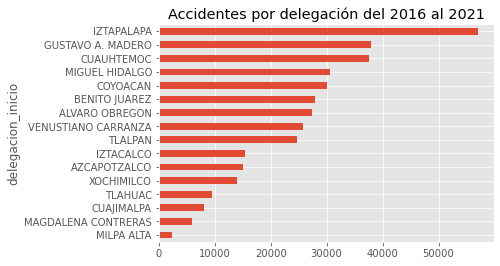

In [66]:
# En que delegación hay más accidentes por año
top_delegaciones = df.groupby('delegacion_inicio').size().sort_values(ascending=False).index.to_list()
top_5_delegaciones = top_delegaciones[:6]

df.groupby('delegacion_inicio').size().sort_values(ascending=True).plot(kind='barh', title='Accidentes por delegación del 2016 al 2021')

<AxesSubplot:title={'center':'Accidentes por delegacion Top 5'}, xlabel='fecha_hora_creacion'>

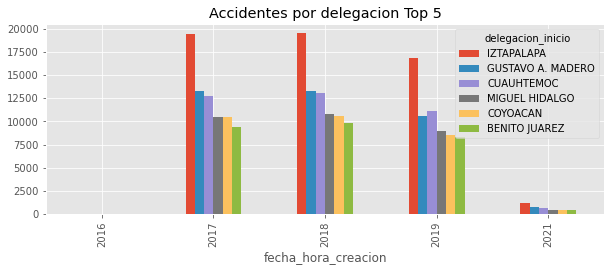

In [67]:
accidentes_por_delegacion_por_anio = df.groupby(['delegacion_inicio',df['fecha_hora_creacion'].dt.year]).size().sort_values(ascending=False)

accidentes_por_delegacion_por_anio.loc[(top_5_delegaciones)].unstack(level=0).plot(kind='bar', subplots=False, figsize=(10,3.5), title='Accidentes por delegacion Top 5')

## La preparación de las autoriades para responder a dichos incidentes

### ¿Cómo se enteran las autoridades de u incidente vial?

<AxesSubplot:title={'center':'Forma de levantamiento del 2016 al 2021'}, ylabel='tipo_entrada'>

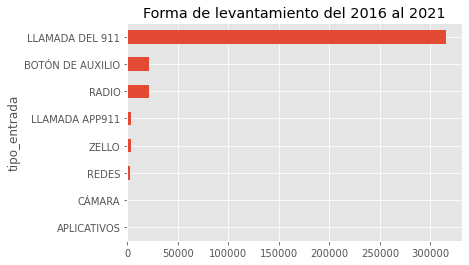

In [68]:
top_tipo_entrada = df.groupby('tipo_entrada').size().sort_values(ascending=False).index.to_list()
top_5_tipo_entrada = top_tipo_entrada[:5]
df.groupby('tipo_entrada').size().sort_values(ascending=True).plot(kind='barh', title='Forma de levantamiento del 2016 al 2021')

<AxesSubplot:title={'center':'Tipo de levantamiento por delegación del 2016 al 2021'}, xlabel='delegacion_inicio'>

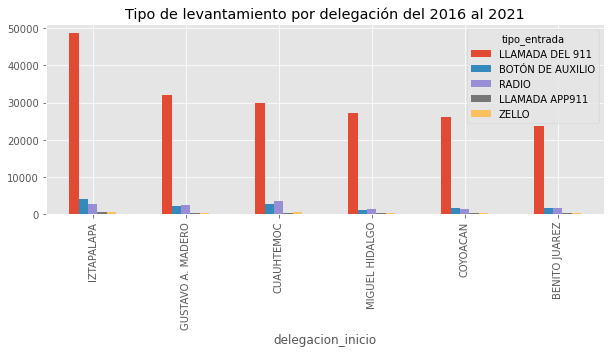

In [69]:
via_reporte_por_delegacion = df.groupby(['tipo_entrada', 'delegacion_inicio']).size()

via_reporte_por_delegacion.loc[(top_5_tipo_entrada, top_5_delegaciones)].unstack(level=0).plot(kind='bar', subplots=False, figsize=(10,3.5), title="Tipo de levantamiento por delegación del 2016 al 2021")

## ¿Qué proceso se lleva a cabo después de que ocurre un incidente?

In [70]:
# Agregar columnas auxiliares delta de tiempo
df['delta_timedate'] = (df['fecha_hora_cierre'] - df['fecha_hora_creacion'])
df['delta_hours'] = (df['fecha_hora_cierre'] - df['fecha_hora_creacion']).astype('timedelta64[h]')

In [74]:
print(f"El tiempo más corto en cerrar un caso fue: {df['delta_timedate'].min()}")
print(f"El tiempo más largo en cerrar un caso fue: {df['delta_timedate'].min()}")
print(f"El tiempo promedio en cerrar un caso fue: {df['delta_timedate'].mean()}")

El tiempo más corto en cerrar un caso fue: -323 days +00:13:41
El tiempo más largo en cerrar un caso fue: -323 days +00:13:41
El tiempo promedio en cerrar un caso fue: 0 days 00:52:08.401849545


<AxesSubplot:title={'center':'Tiempo promedio de culmino por delegación'}, ylabel='delegacion_inicio'>

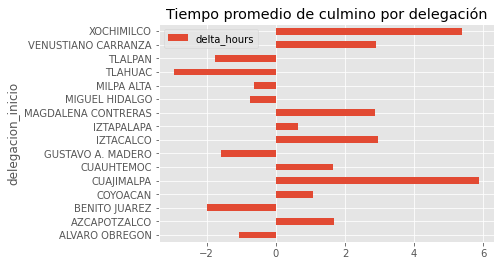

In [72]:
 # Tiempo promedio de respuesta por delegación en horas
 (df[df['delegacion_inicio'] == df['delegacion_cierre']])[['delegacion_inicio','delta_hours']].groupby('delegacion_inicio').mean().plot(kind='barh', title="Tiempo promedio de culmino por delegación")

In [73]:
# Indices de los casos que fueron resultos en la misma delegación de origen
indices_resuleto_en_delegacion = df[df['delegacion_inicio'] == df['delegacion_cierre']].index
# Crear una columna booleana si fué resulto en la misma delegación
df['resuelto_en_delegacion'] = df.index.map(lambda x: x in indices_resuleto_en_delegacion)


### ¿Cuántos casos se resuelven en la misma delegación? vs ¿Cuántos casos se resuelven en otras delegaciones?

<AxesSubplot:title={'center':'Casos resueltos en la misma delegación'}, xlabel='delegacion_inicio'>

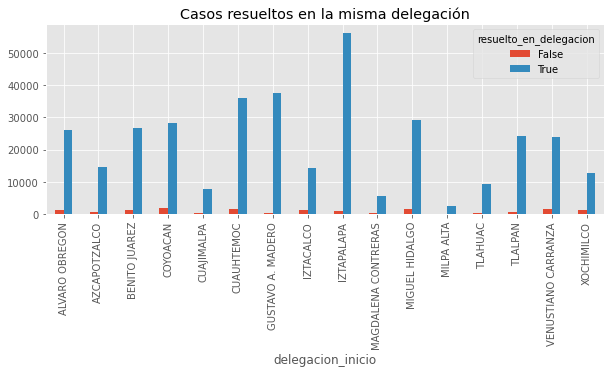

In [61]:
df.groupby(['resuelto_en_delegacion','delegacion_inicio']).size().unstack(level=0).plot(kind='bar', subplots=False, figsize=(10,3.5), title="Casos resueltos en la misma delegación")

### Porcentaje de casos resueltos en la misma delegacion

<AxesSubplot:title={'center':'Porcentaje de casos resueltos en la misma delegación'}, xlabel='delegacion_inicio'>

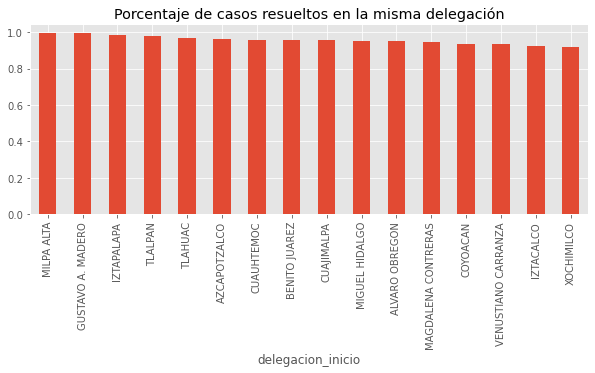

In [62]:
numero_incidencias_por_delegacion = df.groupby('delegacion_inicio').size()

numero_incidencias_resueltas_en_delegacion = df[df['resuelto_en_delegacion']].groupby('delegacion_inicio').size()

(numero_incidencias_resueltas_en_delegacion / numero_incidencias_por_delegacion).sort_values(ascending=False).plot(kind='bar', subplots=False, figsize=(10,3.5), title="Porcentaje de casos resueltos en la misma delegación")